# ANN model generation

In [1]:
from ai_reacting_flows.ann_model_generation.MLP_model import MLPModel

2022-09-01 17:19:01.768822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCC/10.3.0/OpenMPI/4.1.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/PMIx/3.2.3/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libfabric/1.12.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/UCX/1.10.0/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libevent/2.1.12/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/hwloc/2.4.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libpciaccess/0.16/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libxml2/2.9.10/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/numactl

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Dictionary with parameters
training_parameters = {}

# Model folder name
training_parameters["model_name_suffix"] = "TEST"
    
# Dataset folder name
training_parameters["dataset_path"] = "/work/mehlc/2_IA_KINETICS/ai_reacting_flows/scripts/STOCH_DTB_hotspot_H2_DEV/database_1"
    
# Simulation time-step
training_parameters["dt_simu"] = 5.0e-07
    
# Fuel -> We could get them from database, more automatic
training_parameters["fuel"] = "H2"
training_parameters["mechanism"] = "/work/mehlc/2_IA_KINETICS/ai_reacting_flows/data/chemical_mechanisms/mech_H2.cti"

# Possibility to remove N2 from the network
training_parameters["remove_N2"] = True

# Network shapes
training_parameters["nb_units_in_layers_list"] = [[20,20], [10,10], [10,10]]
training_parameters["layers_activation_list"] = [['tanh','tanh'],['tanh','tanh'],['tanh','tanh']]
    
# Optimization parameters
training_parameters["batch_size"] = 512
training_parameters["initial_learning_rate"] = 1.0e-3
# Parameters of the exponential decay schedule ( learning rate decay)
training_parameters["decay_steps"] = 50
training_parameters["decay_rate"] = 0.92
training_parameters["staircase"] = True

# L2 regularization coefficient
training_parameters["alpha_reg"] = 0.0 
        
# epochs number
training_parameters["epochs_list"] = [1,1,1]

# Enforcing hard contraints
# 0: no hard constraints; 1: atomic masses
training_parameters["hard_constraints_model"] = 0

In [4]:
mlp_model = MLPModel(training_parameters)

>> Number of clusters is: 3


--------------------------------------------------
--------------------------------------------------
                BUILDING MODEL FOR CLUSTER 0
--------------------------------------------------
--------------------------------------------------

 >> Number of training samples: 75
 >> Number of validation samples: 25 

--------------------------------------------------
                MODEL TRAINING
--------------------------------------------------


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.


2022-09-01 17:19:12.446944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 17:19:12.447455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCC/10.3.0/OpenMPI/4.1.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/PMIx/3.2.3/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libfabric/1.12.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/UCX/1.10.0/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libevent/2.1.12/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/hwloc/2.4.1/lib:/soft/irsrvsoft1/expl/eb/cent

1/1 [==============================] - 1s 962ms/step - loss: 3.9096e-27 - mean_absolute_percentage_error: 5.1766e-05 - mean_absolute_error: 5.1766e-14 - mean_squared_error: 3.9096e-27 - sum_species: 9.0240 - val_loss: 4.5889e-22 - val_mean_absolute_percentage_error: 0.0183 - val_mean_absolute_error: 1.8278e-11 - val_mean_squared_error: 4.5889e-22 - val_sum_species: 9.0240 - lr: 0.0010
INFO:tensorflow:Assets written to: ./MODEL_TEST/my_model_cluster0/assets
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


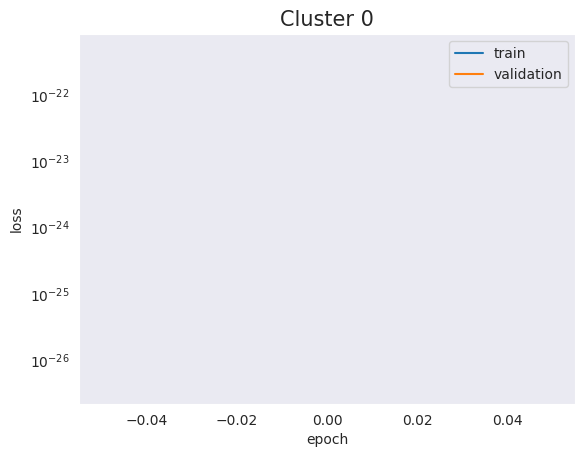

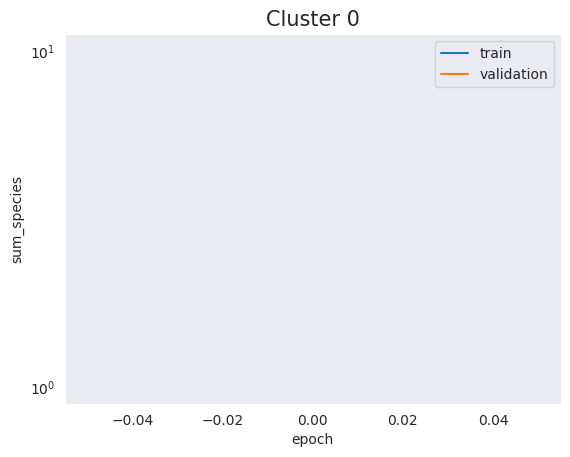

1/1 [==============================] - 0s 80ms/step
--------------------------------------------------
--------------------------------------------------
                BUILDING MODEL FOR CLUSTER 1
--------------------------------------------------
--------------------------------------------------

 >> Number of training samples: 750
 >> Number of validation samples: 250 

--------------------------------------------------
                MODEL TRAINING
--------------------------------------------------


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
2/2 [==============================] - 1s 225ms/step - loss: 2.5253e-25 - mean_absolute_percentage_error: 2.2237e-04 - mean_absolute_error: 2.2237e-13 - mean_squared_error: 2.5253e-25 - sum_species: 8.0000 - val_loss: 9.4625e-20 - val_mean_absolute_percentage_error: 0.2459 - val_mean_absolute_error: 2.4594e-10 - val_mean_squared_error: 9.4625e-20 - val_sum_species: 8.0000 - lr: 0.0010
INFO:tensorflow:Asse

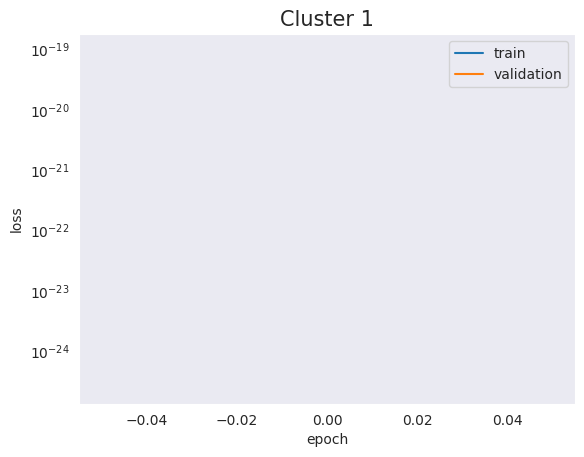

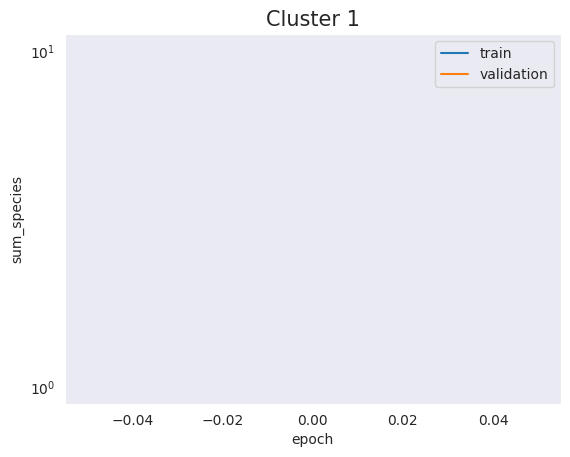

8/8 [==============================] - 0s 1ms/step
--------------------------------------------------
--------------------------------------------------
                BUILDING MODEL FOR CLUSTER 2
--------------------------------------------------
--------------------------------------------------

 >> Number of training samples: 75
 >> Number of validation samples: 25 

--------------------------------------------------
                MODEL TRAINING
--------------------------------------------------


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
1/1 [==============================] - 1s 796ms/step - loss: 3.5640e-29 - mean_absolute_percentage_error: 4.8188e-06 - mean_absolute_error: 4.8188e-15 - mean_squared_error: 3.5640e-29 - sum_species: 12.1656 - val_loss: 5.3596e-24 - val_mean_absolute_percentage_error: 0.0020 - val_mean_absolute_error: 2.0228e-12 - val_mean_squared_error: 5.3596e-24 - val_sum_species: 12.1656 - lr: 0.0010
INFO:tensorflow:Asset

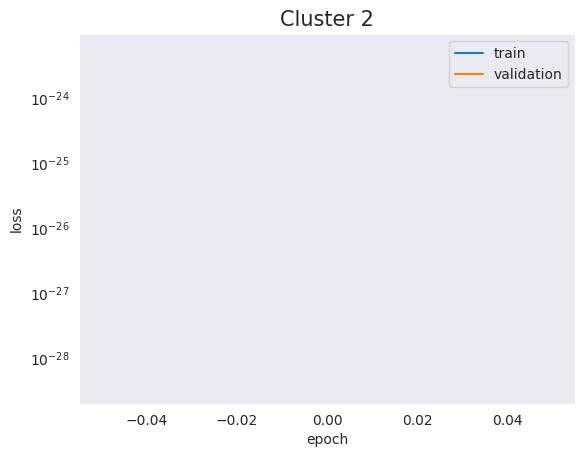

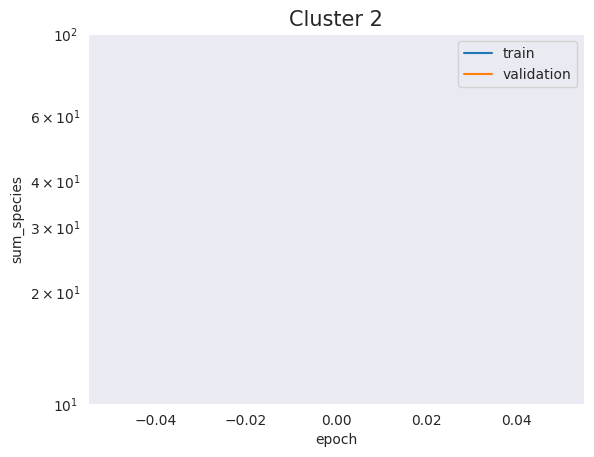

1/1 [==============================] - 0s 50ms/step


In [5]:
mlp_model.train_models()

In [6]:
mlp_model.models_list[0].summary()

Model: "main_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 9)]               0         
                                                                 
 dense_layer_1 (Dense)       (None, 19)                190       
                                                                 
 dense_layer_2 (Dense)       (None, 20)                400       
                                                                 
 output_layer (Dense)        (None, 8)                 168       
                                                                 
Total params: 758
Trainable params: 758
Non-trainable params: 0
_________________________________________________________________
